<a href="https://colab.research.google.com/github/eirinits16/ef2023/blob/main/Customer_Segmentation_ef.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Segmentation based on Frequency and Orders Value

Monetary value captures the amount that each customer spends for all his orders.

Frequency value defines how often a customer orders.  

In [1]:
#To run the notebook the csv file should be uploaded in Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
ls

drive/  sample_data/


In [3]:
#install kneed package to use it in order to identify the knee/elbow point of a line fit to the data
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#import of necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [5]:
#Read the csv file as dataframe
df = pd.read_csv('/content/drive/MyDrive/Assessment exercise dataset - orders.csv')
df.head()

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount
0,7322173742136,94223136441,2022-01-18 15:41:28 UTC,Αίγιο,Breakfast,True,3.6
1,7210978616924,204794985423,2022-01-02 17:50:50 UTC,Αγρίνιο,Breakfast,True,1.9
2,7221232906132,12703920390,2022-01-04 08:37:12 UTC,Αγρίνιο,Breakfast,True,1.7
3,7399605199800,673310109528,2022-01-31 11:33:05 UTC,Λιβαδειά,Breakfast,True,3.0
4,7264221279744,673310109528,2022-01-10 11:18:28 UTC,Λιβαδειά,Breakfast,True,3.0


In [6]:
#Check columns' datatypes and if dataset contains null values 
#There are no null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534270 entries, 0 to 534269
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   order_id         534270 non-null  int64  
 1   user_id          534270 non-null  int64  
 2   order_timestamp  534270 non-null  object 
 3   city             534270 non-null  object 
 4   cuisine          534270 non-null  object 
 5   paid_cash        534270 non-null  bool   
 6   amount           534270 non-null  float64
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 25.0+ MB


In [7]:
#Calculate Monetary values for each customer (the total amount of money that each customers spends for making orders)
monetary=df.groupby('user_id')['amount'].sum()
monetary=monetary.reset_index()
monetary.head()

,user_id,amount
0,44118921,33.3
1,108938802,44.2
2,110361993,137.0
3,138437670,5.5
4,144777339,60.8


In [8]:
#Calculate Frequency values (Count total number of orders for each customer)
frequency=df.groupby('user_id')['order_id'].count()
frequency=frequency.reset_index()
frequency.head()

,user_id,order_id
0,44118921,1
1,108938802,3
2,110361993,11
3,138437670,1
4,144777339,14


In [9]:
#Merge recency, monetary, frequency values of each customer

rfm = pd.merge(monetary, frequency, on ='user_id', how='inner')

#Rename columns of dataframe
rfm.columns=['user_id', 'Monetary', 'Frequency']
rfm

,user_id,Monetary,Frequency
0,44118921,33.3,1
1,108938802,44.2,3
2,110361993,137.0,11
3,138437670,5.5,1
4,144777339,60.8,14
...,...,...,...
121938,685557444369,6.8,1
121939,685561325799,8.7,1
121940,685561843323,7.2,1
121941,685566242277,11.5,1


Check for outliers for Monetary, Frequency Columns

If outliers are detected, there is need of standarization.

[]

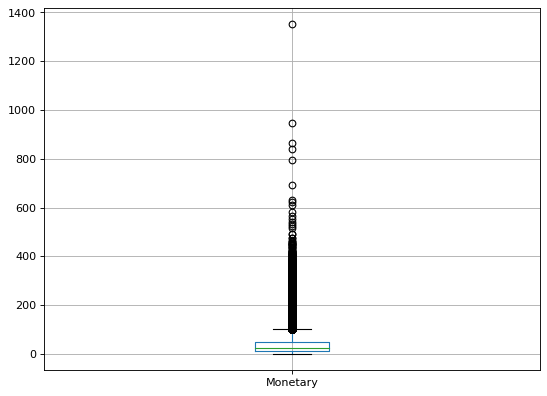

In [10]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plot=rfm.boxplot(column = ['Monetary'])
plot.plot()

In [11]:
#print max/min values for Monetary/Frequency Columns

max_monetary=rfm['Monetary'].max()
print("Max Monetary:", max_monetary)

min_monetary=rfm['Monetary'].min()
print("Min Monetary:", min_monetary)

max_frequency=rfm['Frequency'].max()
print("Max frequency:", max_frequency)

min_frequency=rfm['Frequency'].min()
print("Min frequency:", min_frequency)

Max Monetary: 1351.5
Min Monetary: 0.4
Max frequency: 135
Min frequency: 1


[]

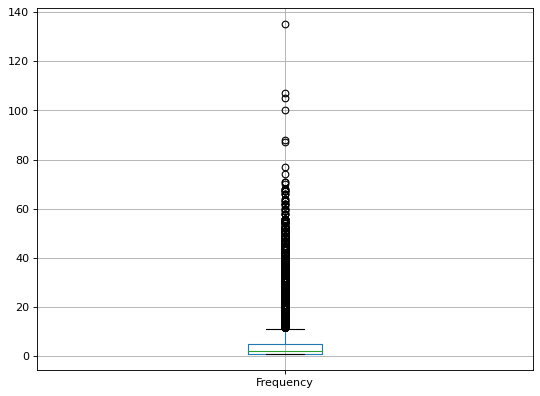

In [12]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plot=rfm.boxplot(column = ['Frequency'])
plot.plot()

In [13]:
#Standarization is needed beacause Monetary and Frequency are not in the same scale

scaler= StandardScaler()
rfm_normalized=rfm[['Monetary','Frequency']]
rfm_normalized


,Monetary,Frequency
0,33.3,1
1,44.2,3
2,137.0,11
3,5.5,1
4,60.8,14
...,...,...
121938,6.8,1
121939,8.7,1
121940,7.2,1
121941,11.5,1


In [14]:
rfm_normalized=scaler.fit_transform(rfm_normalized)
rfm_normalized=pd.DataFrame(rfm_normalized)
rfm_normalized

,0,1
0,-0.096660,-0.621203
1,0.164188,-0.253769
2,2.384986,1.215963
3,-0.761943,-0.621203
4,0.561443,1.767113
...,...,...
121938,-0.730832,-0.621203
121939,-0.685363,-0.621203
121940,-0.721260,-0.621203
121941,-0.618357,-0.621203


In [15]:
#rename columns of rfm_normalized dataframe

rfm_normalized.columns=['Monetary', 'Frequency']
rfm_normalized

,Monetary,Frequency
0,-0.096660,-0.621203
1,0.164188,-0.253769
2,2.384986,1.215963
3,-0.761943,-0.621203
4,0.561443,1.767113
...,...,...
121938,-0.730832,-0.621203
121939,-0.685363,-0.621203
121940,-0.721260,-0.621203
121941,-0.618357,-0.621203


##KMeans Algorithm to segment clustomers to clusters

In [16]:
ssd = {}

for cluster in range(2,11):
  kmeans=KMeans(n_clusters=cluster, max_iter=50)
  kmeans.fit(rfm_normalized)

  ssd[cluster]=kmeans.inertia_

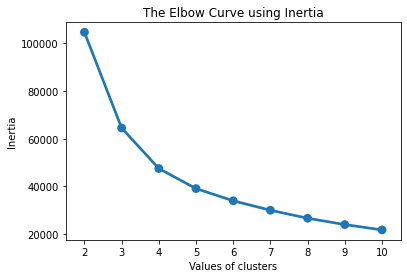

In [17]:
#Elbow Curve in order to select the appropriate number of clusters for the specified dataset
sns.pointplot(x=list(ssd.keys()),y=list(ssd.values()))
plt.xlabel('Values of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Curve using Inertia')
plt.show()


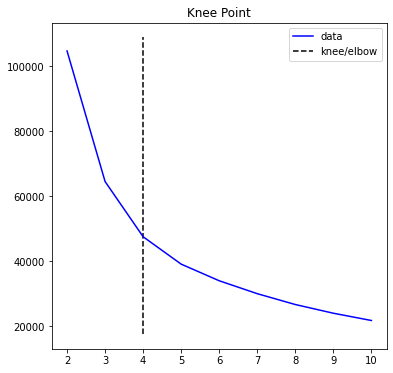

In [18]:
from kneed import KneeLocator

kneedle=KneeLocator(list(ssd.keys()),list(ssd.values()), S=1.0,curve="convex", direction="decreasing")
kneedle.plot_knee()



---From the Elbow Method curve, it can be observed that 3 clusters is the optimal number of clusters for this dataset.










In [19]:
for num_clusters in range(2,11):
  kmeans=KMeans(n_clusters=num_clusters, max_iter=50)
  kmeans.fit(rfm_normalized)

  cluster_labels=kmeans.labels_

  silhouette_avg=silhouette_score(rfm_normalized,cluster_labels)
  print('For n_clusters={0}, the silhouette score is {1}'.format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.7160397710926917
For n_clusters=3, the silhouette score is 0.6308093583222781
For n_clusters=4, the silhouette score is 0.5728509052348583
For n_clusters=5, the silhouette score is 0.5268630710569213
For n_clusters=6, the silhouette score is 0.5012490833494051
For n_clusters=7, the silhouette score is 0.4963644455860322
For n_clusters=8, the silhouette score is 0.47412671880797086
For n_clusters=9, the silhouette score is 0.46048239951169484
For n_clusters=10, the silhouette score is 0.4547454977747949


In [20]:
#Run final model KMeans with 3 clusters
kmeans=KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_normalized)

KMeans(max_iter=50, n_clusters=3)

In [21]:
rfm_normalized.loc[:,'user_id']=rfm['user_id']
rfm_normalized

,Monetary,Frequency,user_id
0,-0.096660,-0.621203,44118921
1,0.164188,-0.253769,108938802
2,2.384986,1.215963,110361993
3,-0.761943,-0.621203,138437670
4,0.561443,1.767113,144777339
...,...,...,...
121938,-0.730832,-0.621203,685557444369
121939,-0.685363,-0.621203,685561325799
121940,-0.721260,-0.621203,685561843323
121941,-0.618357,-0.621203,685566242277


In [22]:
#Merge initial dataset with Monetary and Frequency values before normalization with the cluster labels 

rfm['cluster']=kmeans.labels_
rfm


,user_id,Monetary,Frequency,cluster
0,44118921,33.3,1,1
1,108938802,44.2,3,1
2,110361993,137.0,11,0
3,138437670,5.5,1,1
4,144777339,60.8,14,0
...,...,...,...,...
121938,685557444369,6.8,1,1
121939,685561325799,8.7,1,1
121940,685561843323,7.2,1,1
121941,685566242277,11.5,1,1


In [23]:
rfm.columns

Index(['user_id', 'Monetary', 'Frequency', 'cluster'], dtype='object')

In [24]:
#Create 3 different dataframes for each cluster 

df0 = rfm[rfm['cluster']==0]
df1 = rfm[rfm['cluster']==1]
df2 = rfm[rfm['cluster']==2]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

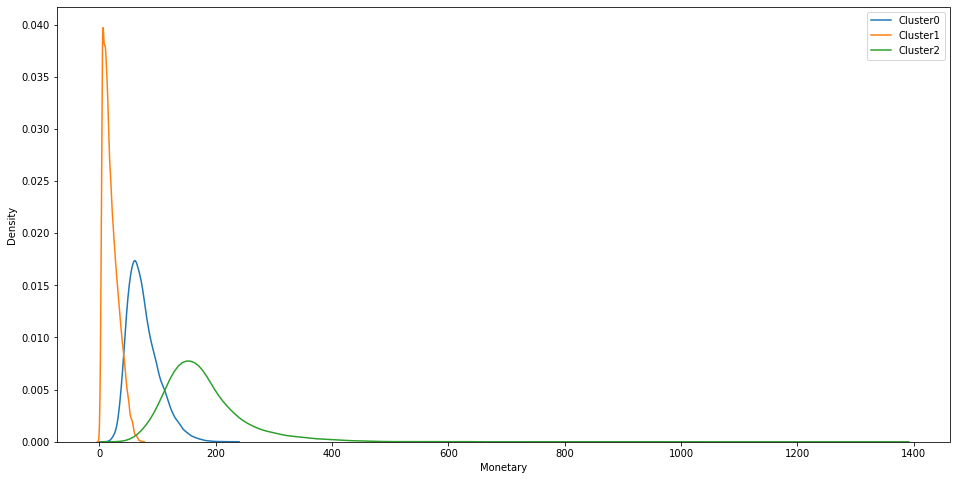

In [25]:
plt.figure(figsize=(16,8))
sns.distplot(df0.Monetary, hist=False, bins=30)
sns.distplot(df1.Monetary, hist=False, bins=30)
sns.distplot(df2.Monetary, hist=False, bins=30)
plt.legend(['Cluster0','Cluster1','Cluster2'])
plt.show()

**---** From the above plot, customers in cluster 2 seem to spend more money on orders in comparison to the other 2 clusters. 





In [26]:
#Count total amount of money spent from customers of each cluster 
#Customers at cluster 0 spent the most for orders

print(df0.Monetary.sum())
print(df1.Monetary.sum())
print(df2.Monetary.sum())

1916544.88
1836417.1299999997
800282.6900000001


In [27]:
money_list = [df0.Monetary.sum(),df1.Monetary.sum(),df2.Monetary.sum()]
cluster_names = ['0', '1', '2']

<BarContainer object of 3 artists>

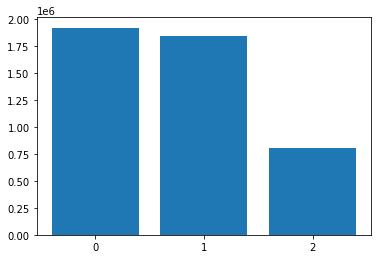

In [28]:
plt.bar(cluster_names, money_list)

In [29]:
df0.Frequency

2         11
4         14
5         12
10         4
11        10
          ..
121438    15
121486     3
121523    12
121547     6
121569     4
Name: Frequency, Length: 25207, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

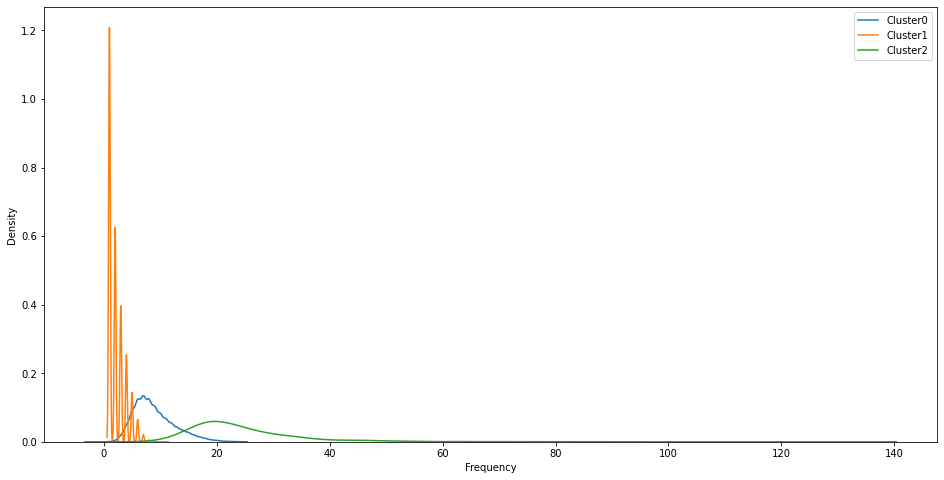

In [30]:
plt.figure(figsize=(16,8))
sns.distplot(df0.Frequency, hist=False, bins=30)
sns.distplot(df1.Frequency, hist=False, bins=30)
sns.distplot(df2.Frequency, hist=False, bins=30)
plt.legend(['Cluster0','Cluster1','Cluster2'])
plt.show()

**---**From the above plot, cluster 2 contains the most frequent customers.




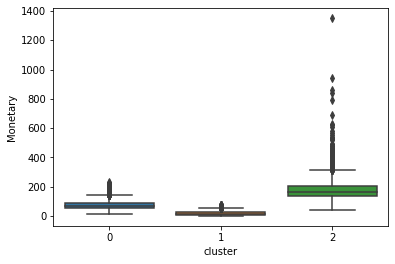

In [31]:
sns.boxplot(x='cluster', y='Monetary', data=rfm)

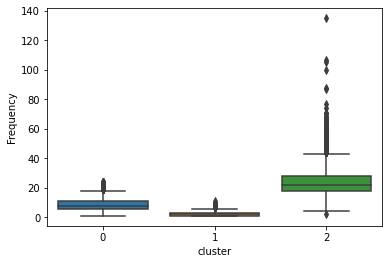

In [32]:
sns.boxplot(x='cluster', y='Frequency', data=rfm)


**---**In terms of frequency, customers that are grouped in cluster 2 are more 
frequent customers, followed by customers grouped in cluster 0.
In terms of monetary, customers in group 2 spend the most money on orders, followed by customers grouped in cluster 0.

In [33]:
#Extract in a new dataframe columns userid and cuisine from initial dataframe.

rfm_cuisine=df[['user_id', 'cuisine']].copy()
rfm_cuisine


,user_id,cuisine
0,94223136441,Breakfast
1,204794985423,Breakfast
2,12703920390,Breakfast
3,673310109528,Breakfast
4,673310109528,Breakfast
...,...,...
534265,314285338626,Street food
534266,586121418057,Street food
534267,29082002418,Street food
534268,348528607896,Street food


In [34]:
#Merge rfm_cuisine dataframe with rfm dataframe

new_df=pd.merge(rfm_cuisine,rfm, on ='user_id', how='left')
new_df


,user_id,cuisine,Monetary,Frequency,cluster
0,94223136441,Breakfast,103.60,11,0
1,204794985423,Breakfast,30.50,7,1
2,12703920390,Breakfast,35.70,21,0
3,673310109528,Breakfast,23.90,8,1
4,673310109528,Breakfast,23.90,8,1
...,...,...,...,...,...
534265,314285338626,Street food,50.50,3,1
534266,586121418057,Street food,47.80,5,1
534267,29082002418,Street food,185.40,13,2
534268,348528607896,Street food,104.60,9,0


In [35]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534270 entries, 0 to 534269
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    534270 non-null  int64  
 1   cuisine    534270 non-null  object 
 2   Monetary   534270 non-null  float64
 3   Frequency  534270 non-null  int64  
 4   cluster    534270 non-null  int32  
dtypes: float64(1), int32(1), int64(2), object(1)
memory usage: 22.4+ MB


In [36]:
#Select Breakfast cuisine from previous dataframe

df_query=new_df.query("cuisine=='Breakfast'")
df_query

,user_id,cuisine,Monetary,Frequency,cluster
0,94223136441,Breakfast,103.60,11,0
1,204794985423,Breakfast,30.50,7,1
2,12703920390,Breakfast,35.70,21,0
3,673310109528,Breakfast,23.90,8,1
4,673310109528,Breakfast,23.90,8,1
...,...,...,...,...,...
207958,169008847728,Breakfast,93.10,20,0
207959,204555630573,Breakfast,250.95,50,2
207960,311089886688,Breakfast,23.20,5,1
207961,210899698527,Breakfast,4.00,2,1


In [37]:
#Cluster 2


breakfast_cluster2 = df_query.loc[df_query['cluster'] == 2]
breakfast_cluster2

,user_id,cuisine,Monetary,Frequency,cluster
5,212289897372,Breakfast,110.00,22,2
8,45669681666,Breakfast,284.40,41,2
11,45669681666,Breakfast,284.40,41,2
12,45669681666,Breakfast,284.40,41,2
16,51706857888,Breakfast,213.80,13,2
...,...,...,...,...,...
207936,124388704734,Breakfast,331.30,28,2
207937,185683341627,Breakfast,164.00,28,2
207949,156581932059,Breakfast,209.49,32,2
207952,318866719836,Breakfast,125.90,17,2


In [38]:
#Cluster 1

breakfast_cluster1 = df_query.loc[df_query['cluster'] == 1]
breakfast_cluster1

,user_id,cuisine,Monetary,Frequency,cluster
1,204794985423,Breakfast,30.50,7,1
3,673310109528,Breakfast,23.90,8,1
4,673310109528,Breakfast,23.90,8,1
7,343181291166,Breakfast,37.00,7,1
9,287462587230,Breakfast,38.00,4,1
...,...,...,...,...,...
207953,289198750869,Breakfast,18.40,3,1
207956,205283139936,Breakfast,45.95,4,1
207960,311089886688,Breakfast,23.20,5,1
207961,210899698527,Breakfast,4.00,2,1


In [39]:
#Cluster 0


breakfast_cluster0 = df_query.loc[df_query['cluster'] == 0]
breakfast_cluster0

,user_id,cuisine,Monetary,Frequency,cluster
0,94223136441,Breakfast,103.60,11,0
2,12703920390,Breakfast,35.70,21,0
6,255327451974,Breakfast,41.10,7,0
10,313078213896,Breakfast,50.80,14,0
14,50547474747,Breakfast,65.10,8,0
...,...,...,...,...,...
207947,320362364196,Breakfast,77.30,11,0
207954,273208811841,Breakfast,56.15,5,0
207955,290110628157,Breakfast,120.20,12,0
207957,169008847728,Breakfast,93.10,20,0


In [40]:
print(breakfast_cluster0.Monetary.sum())
print(breakfast_cluster1.Monetary.sum())
print(breakfast_cluster2.Monetary.sum())

6337657.07
1343839.7299999997
10639486.09


#### RESULTS:
From the above metrics, it can be concluded that customers who belong in cluster 0 can possibly consist a valuable target group for applying a marketing campaign. Customers of cluster 0 place orders in a frequent rate as well as customers of cluster 2. But customers of cluster 0 bring more profit from their orders to the company. Thus they are a suitable group for the campaign in order to build and preserve customer loyalty.

#### CITATIONS:
https://medium.com/web-mining-is688-spring-2021/exploring-customers-segmentation-with-rfm-analysis-and-k-means-clustering-118f9ffcd9f0

https://kneed.readthedocs.io/en/stable/